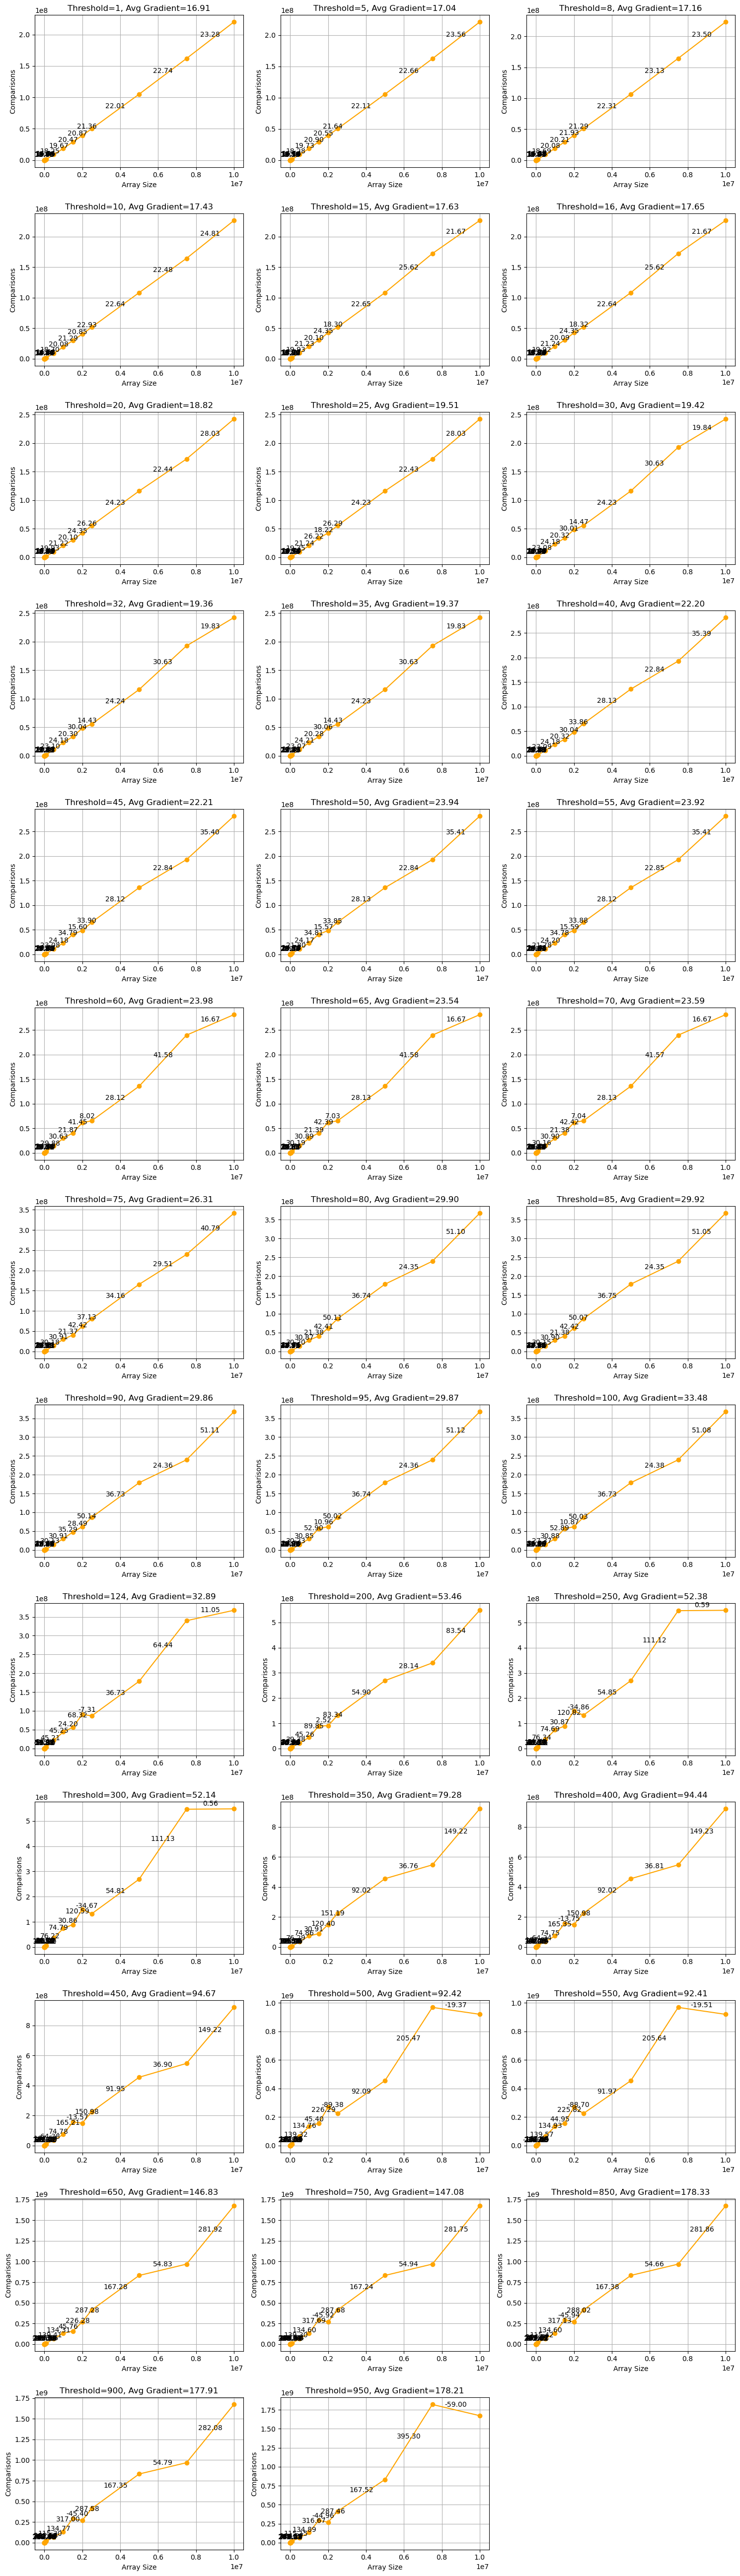

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
data = pd.read_csv('sorting_results.csv')

# Filter the data to include only HybridMergeSort
hybrid_merge_sort_data = data[data['Algorithm'] == 'HybridMergeSort']

# Get unique thresholds from the data
unique_thresholds = hybrid_merge_sort_data['Threshold'].unique()

# Set the number of columns for subplots
n_cols = 3  # Number of graphs per row
n_rows = (len(unique_thresholds) + n_cols - 1) // n_cols  # Calculate rows needed

# Create subplots with increased height for better layout
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  # Increase height proportionally
axes = axes.flatten()  # Flatten the axes array for easy indexing

# List to store the average gradients for each threshold
avg_gradients_list = []

# Loop through each threshold, plot the comparisons for different array sizes
for idx, threshold in enumerate(unique_thresholds):
    # Filter data for the current threshold
    threshold_data = hybrid_merge_sort_data[hybrid_merge_sort_data['Threshold'] == threshold]
    
    # Sort data by Array Size to ensure proper calculation of gradients
    threshold_data = threshold_data.sort_values(by='Array Size')

    # Extract array sizes and comparisons for the current threshold
    array_sizes = threshold_data['Array Size'].values
    comparisons = threshold_data['Comparisons'].values

    # Calculate the gradients (change in Comparisons / change in Array Size)
    gradients = np.diff(comparisons) / np.diff(array_sizes)  # Calculate gradient between consecutive points

    # Calculate the average gradient
    avg_gradient = np.mean(gradients) if len(gradients) > 0 else 0  # Handle case where there may not be enough data
    avg_gradients_list.append((threshold, avg_gradient))  # Store the threshold and avg gradient

    # Plot for HybridMergeSort with the current threshold
    axes[idx].plot(array_sizes, comparisons, marker='o', color='orange')
    
    # Set title to include the threshold and the average gradient
    axes[idx].set_title(f'Threshold={threshold}, Avg Gradient={avg_gradient:.2f}')
    axes[idx].set_xlabel('Array Size')
    axes[idx].set_ylabel('Comparisons')
    axes[idx].grid(True)

    # Annotate the plot with gradient values at midpoints between consecutive points
    for i in range(len(gradients)):
        midpoint_x = (array_sizes[i] + array_sizes[i+1]) / 2
        midpoint_y = (comparisons[i] + comparisons[i+1]) / 2
        axes[idx].annotate(f'{gradients[i]:.2f}', (midpoint_x, midpoint_y), textcoords="offset points", xytext=(0,5), ha='center')

# Hide any empty subplots (if the number of thresholds is less than n_rows * n_cols)
for i in range(len(unique_thresholds), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout for the subplots
plt.tight_layout()
plt.show()




[  1   1   5   5   8   8  10  10  15  15  16  16  20  20  25  25  30  30
  32  32  35  35  40  40  45  45  50  50  55  55  60  60  65  65  70  70
  75  75  80  80  85  85  90  90  95  95 100 100 124 124 200 200 250 250
 300 300 350 350 400 400 450 450 500 500 550 550 650 650 750 750 850 850
 900 900 950 950]


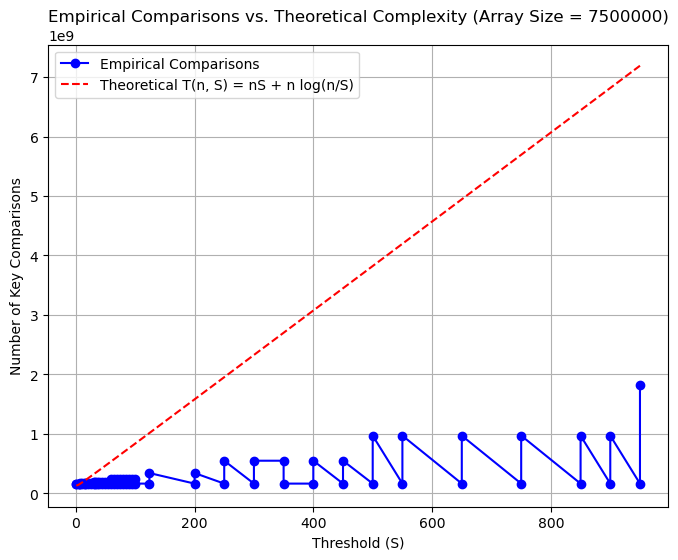

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
data = pd.read_csv('sorting_results.csv')

# Fixed input size (n)
fixed_array_size = 7500000  # You can choose any value of n for which you have data

# Filter the data for the fixed array size
fixed_size_data = data[data['Array Size'] == fixed_array_size]

# Sort data by Threshold to ensure proper plotting
fixed_size_data = fixed_size_data.sort_values(by='Threshold')

# Extract thresholds and comparisons for the fixed array size
thresholds = fixed_size_data['Threshold'].values
comparisons = fixed_size_data['Comparisons'].values

print(thresholds)
# Theoretical Time Complexity Analysis
# Using the formula T(n, S) = nS + n log(n/S)
n = fixed_array_size
theoretical_comparisons = [n * S + n * np.log(n / S) for S in thresholds]

# Plot Empirical Results
plt.figure(figsize=(8, 6))
plt.plot(thresholds, comparisons, marker='o', color='blue', label='Empirical Comparisons')

# Plot Theoretical Results
plt.plot(thresholds, theoretical_comparisons, color='red', linestyle='--', label='Theoretical T(n, S) = nS + n log(n/S)')

# Set plot title and labels
plt.title(f'Empirical Comparisons vs. Theoretical Complexity (Array Size = {fixed_array_size})')
plt.xlabel('Threshold (S)')
plt.ylabel('Number of Key Comparisons')

# Add grid and legend
plt.grid(True)
plt.legend()

# Show the plot
plt.show()
